In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### TODO
Labeling 
where to get info

# More plots types
## Scatter

#### Data

In [6]:
X = np.random.normal(size=20)
dX = np.random.normal(0.3, 0.05, size=20)
Y = np.random.normal(size=20)
dY = np.random.uniform(0.5, 1.5, size=[20])*dX

#### Plot

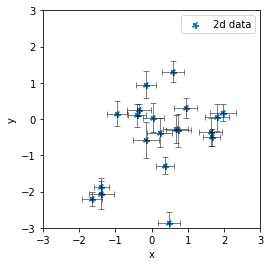

In [7]:
fig, ax = plt.subplots()
ax.errorbar(X, Y, xerr=dX, yerr=dY, ls='', lw=1, capsize=3, c='k', alpha=0.5)
ax.scatter(X, Y, s=30, marker=(5, 2, 45), label='2d data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect(1)

## Line-Plot

#### Data

In [8]:
df = 10
dphi = 0.05
X = np.linspace(0, 50, num=500)
Y = np.exp(-X/df) * np.sin(X)
Z = np.exp(-X/(1.5*df)) * np.cos((X-dphi*X))

sampling_rate = 100
y_smpl_x = X[::sampling_rate]
y_smpl_y = Y[::sampling_rate]
y_err = np.random.normal(0.3, 0.3, size=y_smpl_y.shape)
z_smpl_x = X[25::sampling_rate]
z_smpl_y = Z[25::sampling_rate]
z_err = np.random.normal(0.3, 0.3, size=z_smpl_y.shape)

#### Plot

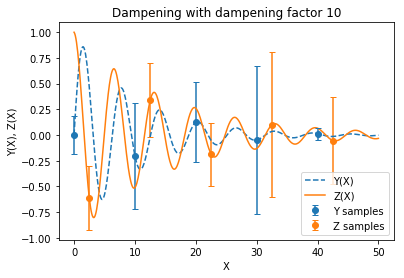

In [9]:
fig, ax = plt.subplots()
Y_lines = ax.plot(X, Y, '--', label='Y(X)')
Z_lines = ax.plot(X, Z, '-', label='Z(X)')
cy = Y_lines[0].get_color()
cz = Z_lines[0].get_color()

ax.errorbar(y_smpl_x, y_smpl_y, yerr=y_err, ls='', marker='o', color=cy, capsize=3, label='Y samples')
ax.errorbar(z_smpl_x, z_smpl_y, yerr=z_err, ls='', marker='o', color=cz, capsize=3, label='Z samples')
ax.set_xlabel('X')
ax.set_ylabel('Y(X), Z(X)')
ax.set_title('Dampening with dampening factor 10')
ax.legend(loc=4)

## Images
Specialities to show:
- Colormaps and colorbars for grayscale images
- one colorbar for multiple images

#### Data

In [10]:
def vector_data(x, y):
    a = np.sin(x) + np.sin(y)
    b = np.cos(x) + np.sin(y)
    c = np.sin(x) + np.cos(y)
    
    return np.array([a,b,c]).T

In [11]:
def get_image_data():
    X, Y = np.meshgrid(np.linspace(-np.pi, np.pi), np.linspace(-np.pi, np.pi))
    Z1 = vector_data(X, Y)
    Z1 -= Z1.min()
    Z1 /= Z1.max()
    Z2 = Z1[..., 1]
    
    return X ,Y, Z1, Z2

In [12]:
X, Y, Z1, Z2 = get_image_data()

#### Plot

(35, 25)

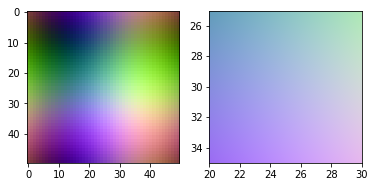

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)

ip = 'bicubic'
ax1.imshow(Z1)
ax2.imshow(Z1, interpolation=ip)
ax2.set_xlim(20, 30)
ax2.set_ylim(35, 25)

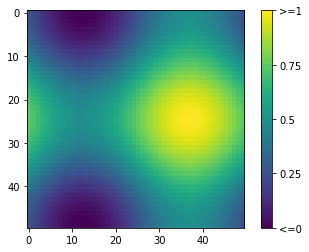

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(Z2, vmin=0, vmax=1)
cbar = fig.colorbar(im)
cbar.set_ticks([1, 0.75, 0.5, 0.25, 0])
cbar.ax.set_yticklabels(['>=1', 0.75, 0.5, 0.25, '<=0'])

In [15]:
import matplotlib.gridspec as gridspec

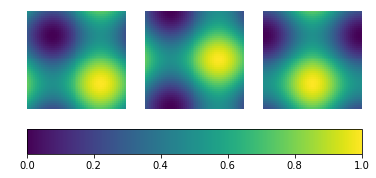

In [16]:
fig = plt.figure()
gs = gridspec.GridSpec(2,3, height_ratios=[1,0.1], hspace=-0.4)
for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    im = ax.imshow(Z1[..., i], vmin=0, vmax=1)
    ax.axis('off')
    
cbar_ax = fig.add_subplot(gs[1, :])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

## Bar - Chart

#### Data

In [17]:
rain = np.array([34, 26, 23, 15, 10, 3, 2, 4, 15, 19, 30, 34])
rain_err = np.random.uniform(2, 5, size=12)

happiness = 100. / rain
happ_err = happiness * rain_err / rain

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#### Plot

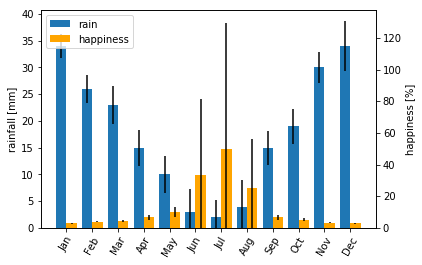

In [18]:
width = 0.4
indeces = np.arange(12)

fig, ax = plt.subplots()
rects1 = ax.bar(indeces, rain, width, yerr=rain_err)
ax.set_ylim(0, None)
ax.set_ylabel(r'rainfall [mm]')

ax2 = ax.twinx()
rects2 = ax2.bar(indeces+width, happiness, width, yerr=happ_err, color='orange')
ax2.set_ylim(0, None)
ax2.set_ylabel(r'happiness [%]')

ax2.legend([rects1[0], rects2[0]], ['rain', 'happiness'], loc='upper left')

ax.set_xticks(indeces + width/2.)
ax.set_xticklabels(months, rotation=60)

## Polar Projection

#### Data

In [19]:
theta = np.linspace(-np.pi, np.pi, num=200)
R1 = 1 + np.cos(theta)
R2 = np.cos(theta**2)

#### Plot

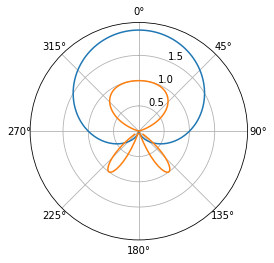

In [20]:
fig = plt.figure()
ax = plt.subplot(projection='polar')
ax.plot(theta, R1)
ax.plot(theta, R2)
ax.set_rticks([0.5, 1, 1.5])
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)

## Contour Plots

#### Data

In [29]:
X, Y, _, Z2 = get_image_data()
Z = 2*Z2 - 1

#### Plot

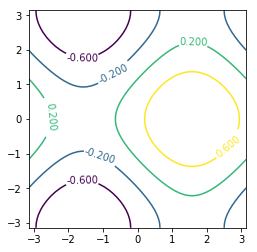

In [31]:
fig, ax = plt.subplots()

# One can but need not specify which lines are drawn
# It is also possible to pass an integer to specify just the number of lines
lines = np.arange(0.2, 1., step=0.4)
lines = np.concatenate([-lines[::-1], lines], axis=0)
cs = ax.contour(X, Y, Z, lines)
plt.clabel(cs, inline_spacing=10)
ax.set_aspect(1)

## Quiver plot

#### Data

In [32]:
X, Y, _, Z2 = get_image_data()
dX = np.sin(X)
dY = -np.cos(Y)

#### Plot

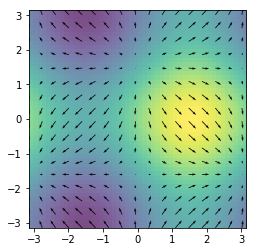

In [33]:
fig, ax = plt.subplots()
ax.imshow(Z2, alpha=0.7, extent=[-np.pi, np.pi, -np.pi, np.pi])
ax.quiver(X[::3, ::3],Y[::3, ::3], dX[::3, ::3], dY[::3, ::3])
ax.set_aspect(1)

## Streamline

#### Data

In [39]:
X, Y, _, Z = get_image_data()

X, Y = X[::3, ::3],Y[::3, ::3]
dX = np.sin(X)
dY = -np.cos(Y)

magnitude = np.sqrt(dX**2 + dY**2)

print X.shape, dX.shape

(17, 17) (17, 17)


#### Plot

(-3.141592653589793, 3.141592653589793)

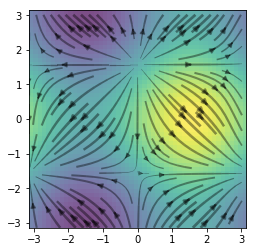

In [55]:
fig, ax = plt.subplots()
ax.imshow(Z, alpha=0.7, extent=[-np.pi, np.pi, -np.pi, np.pi])
ax.streamplot(X, Y, dX, dY, 
              color=[0, 0, 0, 0.4], 
              linewidth=2*magnitude)
ax.set_aspect(1)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)